In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, boxcox

#SK-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Geopandas
import geopandas as gpd



In [3]:
encuesta = pd.read_csv(r'C:\Users\Notebook Asus\Documents\Ciencia de datos\encuesta-anual-hogares-2019.csv',delimiter=',',encoding="ISO-8859-1")

In [4]:
encuesta

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14314,5794,1,1,10,Resto de la Ciudad,99,Varon,Jefe,Casado/a,No corresponde,...,14250,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,5,Pais no limitrofe,Solo obra social,NaN,No corresponde
14315,5794,1,2,10,Resto de la Ciudad,78,Mujer,Otro familiar,Soltero/a,No corresponde,...,14250,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),9,Partido GBA,Solo obra social,No,No corresponde
14316,5794,1,3,10,Resto de la Ciudad,60,Mujer,Hijo/a - Hijastro/a,Separado/a de unión o matrimonio,No corresponde,...,14250,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,CABA,Solo obra social,Si,2
14317,5794,1,4,10,Resto de la Ciudad,92,Mujer,Conyugue o pareja,Casado/a,No corresponde,...,14250,No asiste pero asistió,No corresponde,No corresponde,Primario comun,7,CABA,Solo obra social,Si,1


In [5]:
# Vemos que datos tiene el dataset

encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           14319 non-null  int64 
 1   nhogar                       14319 non-null  int64 
 2   miembro                      14319 non-null  int64 
 3   comuna                       14319 non-null  int64 
 4   dominio                      14319 non-null  object
 5   edad                         14319 non-null  int64 
 6   sexo                         14319 non-null  object
 7   parentesco_jefe              14319 non-null  object
 8   situacion_conyugal           14318 non-null  object
 9   num_miembro_padre            14319 non-null  object
 10  num_miembro_madre            14319 non-null  object
 11  estado_ocupacional           14319 non-null  object
 12  cat_ocupacional              14319 non-null  object
 13  calidad_ingresos_lab         14

In [6]:
# Revisamos valores nulos 

encuesta.isnull().any()

id                             False
nhogar                         False
miembro                        False
comuna                         False
dominio                        False
edad                           False
sexo                           False
parentesco_jefe                False
situacion_conyugal              True
num_miembro_padre              False
num_miembro_madre              False
estado_ocupacional             False
cat_ocupacional                False
calidad_ingresos_lab           False
ingreso_total_lab              False
calidad_ingresos_no_lab        False
ingreso_total_no_lab           False
calidad_ingresos_totales       False
ingresos_totales               False
calidad_ingresos_familiares    False
ingresos_familiares            False
ingreso_per_capita_familiar    False
estado_educativo               False
sector_educativo                True
nivel_actual                   False
nivel_max_educativo             True
años_escolaridad                True
l

In [7]:
# ACA EMPEZAMOS A SACAR INFORMACION QUE NO NOS SIRVE

encuesta.drop(columns=['num_miembro_padre','num_miembro_madre','calidad_ingresos_no_lab','ingreso_total_no_lab','calidad_ingresos_totales','ingresos_totales','calidad_ingresos_familiares','ingresos_familiares','ingreso_per_capita_familiar','nivel_max_educativo','hijos_nacidos_vivos','calidad_ingresos_lab','sector_educativo'],inplace=True)

In [8]:
# Como queda el dataset

encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        14319 non-null  int64 
 1   nhogar                    14319 non-null  int64 
 2   miembro                   14319 non-null  int64 
 3   comuna                    14319 non-null  int64 
 4   dominio                   14319 non-null  object
 5   edad                      14319 non-null  int64 
 6   sexo                      14319 non-null  object
 7   parentesco_jefe           14319 non-null  object
 8   situacion_conyugal        14318 non-null  object
 9   estado_ocupacional        14319 non-null  object
 10  cat_ocupacional           14319 non-null  object
 11  ingreso_total_lab         14319 non-null  int64 
 12  estado_educativo          14319 non-null  object
 13  nivel_actual              14319 non-null  object
 14  años_escolaridad      

In [9]:
np.unique(encuesta.dominio)

array(['Resto de la Ciudad', 'Villas de emergencia'], dtype=object)

In [10]:
# Empezamos a ver como se compone cada feature

In [11]:
encuesta['parentesco_jefe'] = encuesta['parentesco_jefe'].apply(str)
np.unique(encuesta.parentesco_jefe)

array(['Conyugue o pareja', 'Hijo/a - Hijastro/a', 'Jefe', 'Nieto/a',
       'Otro familiar', 'Otro no familiar', 'Padre/Madre/Suegro/a',
       'Servicio domestico y sus familiares', 'Yerno/nuera'], dtype=object)

In [12]:
# Cambiamos estructura

mask = encuesta.parentesco_jefe == 'Jefe'
encuesta.parentesco_jefe.where(mask, 'No Jefe',inplace=True)


In [13]:
np.unique(encuesta.parentesco_jefe)

array(['Jefe', 'No Jefe'], dtype=object)

In [14]:
encuesta['situacion_conyugal'] = encuesta['situacion_conyugal'].apply(str)
np.unique(encuesta.situacion_conyugal)

array(['Casado/a', 'Divorciado/a', 'No corresponde',
       'Separado/a de unión o matrimonio', 'Soltero/a', 'Unido/a',
       'Viudo/a', 'nan'], dtype=object)

In [15]:
encuesta.situacion_conyugal.value_counts()

Soltero/a                           3542
Casado/a                            3511
Unido/a                             2467
No corresponde                      2375
Separado/a de unión o matrimonio    1110
Viudo/a                              797
Divorciado/a                         516
nan                                    1
Name: situacion_conyugal, dtype: int64

In [16]:
# Cambiamos estructura

mask = encuesta.situacion_conyugal != 'Separado/a de unión o matrimonio'
mask2 = encuesta.situacion_conyugal != 'No corresponde'
mask3 = encuesta.situacion_conyugal != 'nan'
encuesta.situacion_conyugal.where(mask, 'Soltero/a',inplace=True)
encuesta.situacion_conyugal.where(mask2, 'Soltero/a',inplace=True)
encuesta.situacion_conyugal.where(mask3, 'Soltero/a',inplace=True)

In [17]:
np.unique(encuesta.situacion_conyugal)

array(['Casado/a', 'Divorciado/a', 'Soltero/a', 'Unido/a', 'Viudo/a'],
      dtype=object)

In [18]:
encuesta.situacion_conyugal.value_counts()

Soltero/a       7028
Casado/a        3511
Unido/a         2467
Viudo/a          797
Divorciado/a     516
Name: situacion_conyugal, dtype: int64

In [19]:
encuesta['estado_ocupacional'] = encuesta['estado_ocupacional'].apply(str)
np.unique(encuesta.estado_ocupacional)  

array(['Desocupado', 'Inactivo', 'Ocupado'], dtype=object)

In [20]:
#ver si lo tomamos en cuenta#

encuesta['cat_ocupacional'] = encuesta['cat_ocupacional'].apply(str)
np.unique(encuesta.cat_ocupacional)

array(['Asalariado', 'No corresponde', 'Patron/empleador',
       'Trabajador familiar', 'Trabajador por cuenta propia'],
      dtype=object)

In [21]:
#ver si lo tomamos en cuenta#

encuesta.cat_ocupacional.value_counts()

No corresponde                  6932
Asalariado                      5514
Trabajador por cuenta propia    1503
Patron/empleador                 316
Trabajador familiar               54
Name: cat_ocupacional, dtype: int64

In [22]:
encuesta['nivel_actual'] = encuesta['nivel_actual'].apply(str)
np.unique(encuesta.nivel_actual)

array(['Jardin maternal', 'No corresponde', 'Otras escuelas especiales',
       'Postgrado', 'Primario adultos', 'Primario comun',
       'Primario especial', 'Sala de 3', 'Sala de 4', 'Sala de 5',
       'Secundario/medio adultos', 'Secundario/medio comun',
       'Terciario/superior no universitario', 'Universitario'],
      dtype=object)

In [23]:
encuesta.nivel_actual.value_counts()

No corresponde                         9903
Primario comun                         1227
Universitario                          1042
Secundario/medio comun                  910
Terciario/superior no universitario     262
Postgrado                               180
Sala de 4                               173
Sala de 5                               162
Jardin maternal                         161
Sala de 3                               147
Secundario/medio adultos                105
Otras escuelas especiales                23
Primario especial                        15
Primario adultos                          9
Name: nivel_actual, dtype: int64

In [24]:
#Miramos dentro del nivel actual como se distribuye el ingreso en funcion del mismo

encuesta_nivel_actual = pd.pivot_table(encuesta,index=["nivel_actual"],values=["ingreso_total_lab"],aggfunc=("sum","count"))
encuesta_nivel_actual

ingreso_total_lab           
                                                count        sum
nivel_actual                                                    
Jardin maternal                                   161          0
No corresponde                                   9903  254009562
Otras escuelas especiales                          23          0
Postgrado                                         180    9885600
Primario adultos                                    9      34200
Primario comun                                   1227        200
Primario especial                                  15          0
Sala de 3                                         147          0
Sala de 4                                         173          0
Sala de 5                                         162          0
Secundario/medio adultos                          105    1118850
Secundario/medio comun                            910     178500
Terciario/superior no universitario               262    4860780
Universitario                                    1042   17418160

In [25]:
#Asumimos que la categoria "No corresponde" son personas recibidas y las categorizamos en orden

mask0 = (encuesta.nivel_actual != 'Jardin maternal') & (encuesta.nivel_actual != 'Sala de 3') & (encuesta.nivel_actual != 'Sala de 4') & (encuesta.nivel_actual != 'Sala de 5')
mask1 = (encuesta.nivel_actual != 'Primario adultos') & (encuesta.nivel_actual != 'Primario comun') & (encuesta.nivel_actual != 'Primario especial')
mask2 = (encuesta.nivel_actual != 'Otras escuelas especiales') & (encuesta.nivel_actual != 'Secundario/medio adultos') & (encuesta.nivel_actual != 'Secundario/medio comun')
mask3 = (encuesta.nivel_actual != 'No corresponde')
encuesta.nivel_actual.where(mask0, 'Jardin',inplace=True)
encuesta.nivel_actual.where(mask1, 'Primario',inplace=True)
encuesta.nivel_actual.where(mask2, 'Secundario',inplace=True)
encuesta.nivel_actual.where(mask3, 'Recibido universitario',inplace=True)


In [26]:
np.unique(encuesta.nivel_actual)

array(['Jardin', 'Postgrado', 'Primario', 'Recibido universitario',
       'Secundario', 'Terciario/superior no universitario',
       'Universitario'], dtype=object)

In [27]:
encuesta.nivel_actual.value_counts()

Recibido universitario                 9903
Primario                               1251
Universitario                          1042
Secundario                             1038
Jardin                                  643
Terciario/superior no universitario     262
Postgrado                               180
Name: nivel_actual, dtype: int64

In [28]:
encuesta['años_escolaridad'] = encuesta['años_escolaridad'].apply(str)
np.unique(encuesta.años_escolaridad)

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '3', '4', '5', '6', '7', '8', '9',
       'Ningun año de escolaridad aprobado', 'nan'], dtype=object)

In [29]:
encuesta.años_escolaridad.value_counts()

12                                    2824
17                                    1851
15                                    1498
7                                     1263
Ningun año de escolaridad aprobado    1226
14                                     722
9                                      588
19                                     557
10                                     539
13                                     483
11                                     451
8                                      397
16                                     334
3                                      261
2                                      241
6                                      229
5                                      224
4                                      211
1                                      196
18                                     162
nan                                     62
Name: años_escolaridad, dtype: int64

In [30]:
#Cambiamos estructura 

mask0 = (encuesta.años_escolaridad != 'nan') & (encuesta.años_escolaridad != 'Ningun año de escolaridad aprobado')
encuesta.años_escolaridad.where(mask0, 0, inplace=True)

In [31]:
encuesta.años_escolaridad.value_counts()

12    2824
17    1851
15    1498
0     1288
7     1263
14     722
9      588
19     557
10     539
13     483
11     451
8      397
16     334
3      261
2      241
6      229
5      224
4      211
1      196
18     162
Name: años_escolaridad, dtype: int64

In [32]:
encuesta['lugar_nacimiento'] = encuesta['lugar_nacimiento'].apply(str)
np.unique(encuesta.lugar_nacimiento)

array(['CABA', 'Otra provincia', 'PBA excepto GBA', 'PBA sin especificar',
       'Pais limitrofe', 'Pais no limitrofe', 'Partido GBA', 'nan'],
      dtype=object)

In [33]:
encuesta.lugar_nacimiento.value_counts()

CABA                   8750
Otra provincia         1615
Pais limitrofe         1206
Partido GBA            1147
Pais no limitrofe      1030
PBA excepto GBA         565
PBA sin especificar       5
nan                       1
Name: lugar_nacimiento, dtype: int64

In [34]:
#Cambiamos estructura 

mask0 = (encuesta.lugar_nacimiento != 'nan') & (encuesta.lugar_nacimiento != 'PBA excepto GBA') & (encuesta.lugar_nacimiento != 'PBA sin especificar') 
mask1 = (encuesta.lugar_nacimiento != 'Pais limitrofe') & (encuesta.lugar_nacimiento != 'Pais no limitrofe') 
encuesta.lugar_nacimiento.where(mask0, 'PBA', inplace=True)
encuesta.lugar_nacimiento.where(mask1, 'Otro pais', inplace=True)



In [35]:
encuesta['lugar_nacimiento'] = encuesta['lugar_nacimiento'].apply(str)
np.unique(encuesta.lugar_nacimiento)

array(['CABA', 'Otra provincia', 'Otro pais', 'PBA', 'Partido GBA'],
      dtype=object)

In [36]:
# ver si unimos algo o lo dejamos asi 

encuesta['afiliacion_salud'] = encuesta['afiliacion_salud'].apply(str)
np.unique(encuesta.afiliacion_salud)

array(['Otros', 'Solo obra social',
       'Solo plan de medicina prepaga por contratación voluntaria',
       'Solo prepaga o mutual via OS', 'Solo sistema publico', 'nan'],
      dtype=object)

In [37]:
# ver si unimos algo o lo dejamos asi 

encuesta.afiliacion_salud.value_counts()

Solo obra social                                             6789
Solo sistema publico                                         3193
Solo prepaga o mutual via OS                                 2064
Solo plan de medicina prepaga por contratación voluntaria    1392
Otros                                                         877
nan                                                             4
Name: afiliacion_salud, dtype: int64

In [38]:
#Cambiamos estructura 

mask0 = (encuesta.afiliacion_salud != 'nan')
encuesta.afiliacion_salud.where(mask0, 'Solo sistema publico', inplace=True)

In [39]:
encuesta['afiliacion_salud'] = encuesta['afiliacion_salud'].apply(str)
np.unique(encuesta.afiliacion_salud)

array(['Otros', 'Solo obra social',
       'Solo plan de medicina prepaga por contratación voluntaria',
       'Solo prepaga o mutual via OS', 'Solo sistema publico'],
      dtype=object)

In [40]:
np.unique(encuesta.cantidad_hijos_nac_vivos)

array(['1', '10', '11', '12', '15', '2', '3', '4', '5', '6', '7', '8',
       '9', 'No corresponde'], dtype=object)

In [41]:
encuesta.cantidad_hijos_nac_vivos.value_counts()

No corresponde    10286
2                  1633
1                  1168
3                   765
4                   269
5                    94
6                    48
7                    31
8                     8
9                     6
11                    5
10                    3
12                    2
15                    1
Name: cantidad_hijos_nac_vivos, dtype: int64

In [42]:
#Cambiamos estructura 

mask0 = (encuesta.cantidad_hijos_nac_vivos != 'No corresponde')
encuesta.cantidad_hijos_nac_vivos.where(mask0, 0, inplace=True)

In [43]:
encuesta.cantidad_hijos_nac_vivos.value_counts()

0     10286
2      1633
1      1168
3       765
4       269
5        94
6        48
7        31
8         8
9         6
11        5
10        3
12        2
15        1
Name: cantidad_hijos_nac_vivos, dtype: int64

# EMPEZAMOS EL EDA

In [44]:
#Seleccionamos solo a las personas entre 18 a 65 años con ingreso laboral mayor a 0

enc_18a65 = encuesta.loc[(encuesta['edad']>=18)&(encuesta['edad']<=65)&(encuesta['ingreso_total_lab']>0)]
np.shape(enc_18a65)

(6824, 18)

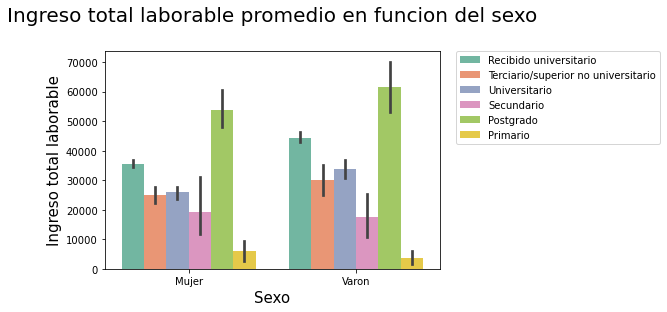

In [44]:
#Graficamos el ingreso total laborable en funcion del sexo, diferenciado segun el nivel actual academico de cada persona

ax = sns.barplot(x='sexo', y='ingreso_total_lab', hue='nivel_actual', data=enc_18a65, palette="Set2",estimator=np.mean)

plt.xlabel("Sexo", size=15)
plt.ylabel("Ingreso total laborable", size=15)
plt.title("Ingreso total laborable promedio en funcion del sexo", size=20, pad=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Text(0.5, 1.0, 'Ingreso total laborable promedio en funcion del Jefe de familia')

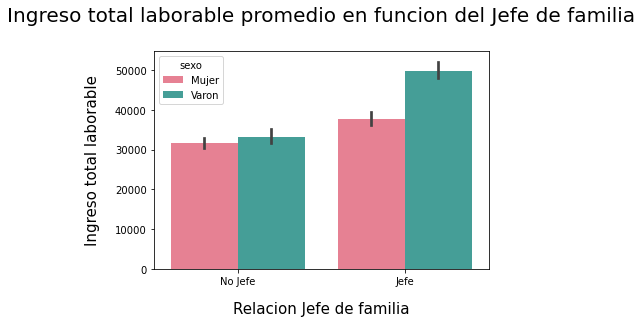

In [45]:
#Graficamos el ingreso total laborable en funcion de si la persona es o no Jefe de familia, diferenciado segun el nivel actual academico de cada persona

ax = sns.barplot(x='parentesco_jefe', y='ingreso_total_lab', data=enc_18a65, palette="husl", hue='sexo',estimator=np.mean)

plt.xlabel("Relacion Jefe de familia", size=15, labelpad=15)
plt.ylabel("Ingreso total laborable", size=15, labelpad=15)
plt.title("Ingreso total laborable promedio en funcion del Jefe de familia", size=20, pad=30)



Text(0.5, 1.1, 'Ingreso total laborable medio por edad')

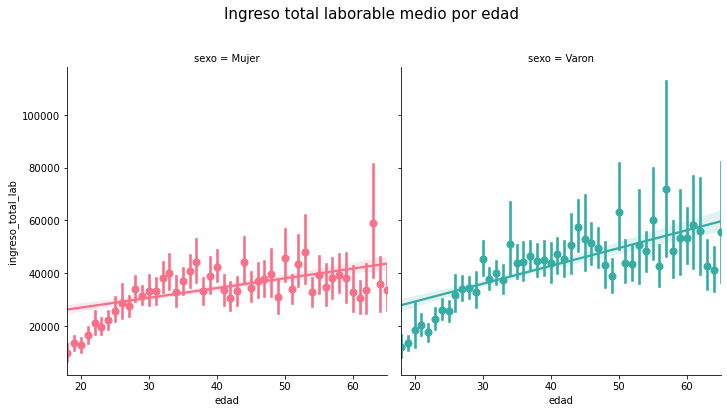

In [46]:
#Hacemos un grafico donde se estima la media del ingreso total segun la edad; a su vez lo dividimos por sexo

ax = sns.lmplot(x='edad', y='ingreso_total_lab', data=enc_18a65,hue="sexo",x_estimator=np.mean, col='sexo',palette="husl")


fig = ax.fig 

# Add a title to the Figure
fig.suptitle("Ingreso total laborable medio por edad", fontsize=15,y=1.1)



Text(0.5, 1.0, 'Encuestas realizadas por comuna')

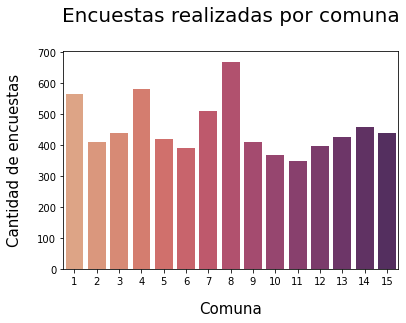

In [47]:
#Graficamos la cantidad de casas encuestadas por cada comuna

sns.countplot(x='comuna', data=enc_18a65,palette="flare")

plt.xlabel("Comuna", size=15, labelpad=15)
plt.ylabel("Cantidad de encuestas", size=15, labelpad=15)
plt.title("Encuestas realizadas por comuna", size=20, pad=30)

Text(0.5, 1.0, 'Promedio de ingresos total laborable por comuna')

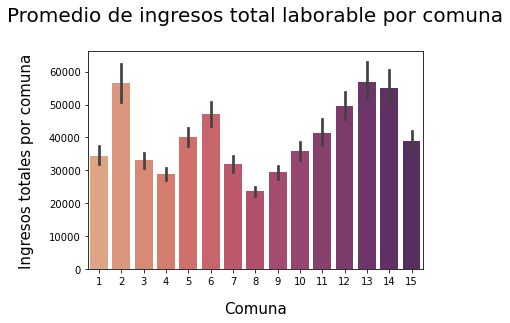

In [48]:
#Graficamos el promedio de ingreso cada comuna

sns.barplot(x='comuna', data=enc_18a65,palette="flare",y='ingreso_total_lab',estimator=np.mean)

plt.xlabel("Comuna", size=15, labelpad=15)
plt.ylabel("Ingresos totales por comuna", size=15, labelpad=15)
plt.title("Promedio de ingresos total laborable por comuna", size=20, pad=30)

Text(0.5, 1.0, 'Encuestas realizadas por estado civil de la persona')

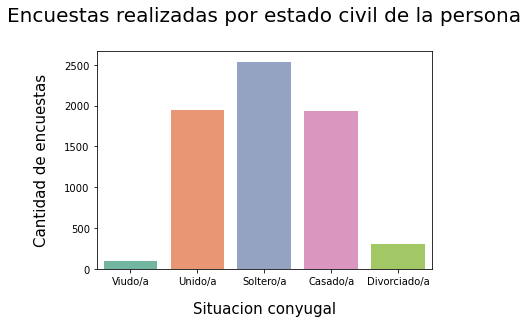

In [49]:
sns.countplot(data=enc_18a65, x='situacion_conyugal', palette="Set2")

plt.xlabel("Situacion conyugal", size=15, labelpad=15)
plt.ylabel("Cantidad de encuestas", size=15, labelpad=15)
plt.title("Encuestas realizadas por estado civil de la persona", size=20, pad=30)

(0.0, 200000.0)

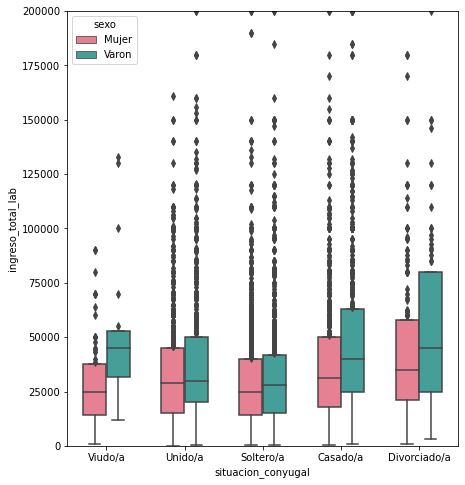

In [54]:
fig, ax = plt.subplots(figsize=(7,8))

sns.boxplot(x="situacion_conyugal", y="ingreso_total_lab", data=enc_18a65, hue='sexo',
            whis=[0, 50], width=.6, palette="husl")

ax.set_ylim(0,200000)
#sns.swarmplot(x="situacion_conyugal", y="ingreso_total_lab", data=enc_18a65, color=".25")



In [55]:
# Vamos a utilizar Geopandas para realizar un grafico de las comunas de la ciudad y mostrar en cuales
# el ingreso total laborable medio es mayor

In [56]:
#Agrupamos el ingreso total laborable medio por comuna

enc_ingxcom = pd.pivot_table(enc_18a65, index=['comuna'], values=['ingreso_total_lab'], aggfunc=np.mean)

enc_ingxcom

,ingreso_total_lab
comuna,
1,34428.193606
2,56473.073171
3,32990.863326
4,28789.641379
5,40056.047619
6,47041.166240
7,31959.009804
8,23587.236527
9,29336.414634


In [57]:
enc_ingxcom.max()

ingreso_total_lab    56971.415493
dtype: float64

In [58]:
# Podemos copiar directamente el URL del JSON que tiene todas las comunas
url = "http://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/CABA_comunas.geojson"

# Lo leo usando Geopandas
comunas = gpd.read_file(url)
comunas

,BARRIOS,PERIMETRO,AREA,COMUNAS,ID,OBJETO,geometry
0,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,ALMAGRO - BOEDO,12323.432479,6.660603e+06,5.0,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2,CABALLITO,10990.964471,6.851029e+06,6.0,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."
3,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07,7.0,4,LIMITE COMUNAL,"MULTIPOLYGON (((-58.45200 -34.62975, -58.45158..."
4,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,9.0,5,LIMITE COMUNAL,"MULTIPOLYGON (((-58.51925 -34.63301, -58.51908..."
5,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,10.0,6,LIMITE COMUNAL,"MULTIPOLYGON (((-58.48834 -34.62016, -58.48820..."
6,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,11.0,7,LIMITE COMUNAL,"MULTIPOLYGON (((-58.49838 -34.59637, -58.49718..."
7,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07,12.0,8,LIMITE COMUNAL,"MULTIPOLYGON (((-58.50331 -34.59386, -58.50347..."
8,PALERMO,22126.531858,1.584587e+07,14.0,9,LIMITE COMUNAL,"MULTIPOLYGON (((-58.42676 -34.55202, -58.42676..."
9,BALVANERA - SAN CRISTOBAL,10486.260809,6.385991e+06,3.0,10,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41192 -34.59800, -58.41029..."


In [59]:
comuna_ingreso = comunas.merge(enc_ingxcom, left_on='COMUNAS', right_on=enc_ingxcom.index)
comuna_ingreso

,BARRIOS,PERIMETRO,AREA,COMUNAS,ID,OBJETO,geometry,ingreso_total_lab
0,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002...",56473.073171
1,ALMAGRO - BOEDO,12323.432479,6.660603e+06,5.0,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...",40056.047619
2,CABALLITO,10990.964471,6.851029e+06,6.0,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...",47041.166240
3,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07,7.0,4,LIMITE COMUNAL,"MULTIPOLYGON (((-58.45200 -34.62975, -58.45158...",31959.009804
4,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,9.0,5,LIMITE COMUNAL,"MULTIPOLYGON (((-58.51925 -34.63301, -58.51908...",29336.414634
5,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,10.0,6,LIMITE COMUNAL,"MULTIPOLYGON (((-58.48834 -34.62016, -58.48820...",35786.909836
6,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,11.0,7,LIMITE COMUNAL,"MULTIPOLYGON (((-58.49838 -34.59637, -58.49718...",41378.939828
7,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07,12.0,8,LIMITE COMUNAL,"MULTIPOLYGON (((-58.50331 -34.59386, -58.50347...",49475.483544
8,PALERMO,22126.531858,1.584587e+07,14.0,9,LIMITE COMUNAL,"MULTIPOLYGON (((-58.42676 -34.55202, -58.42676...",55020.106987
9,BALVANERA - SAN CRISTOBAL,10486.260809,6.385991e+06,3.0,10,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41192 -34.59800, -58.41029...",32990.863326


In [60]:
# Construyo la intersección entre el rectángulo y el shapefile de las comunas

CABA_comunas = gpd.overlay(comuna_ingreso, comunas, how='intersection')
CABA_comunas

,BARRIOS_1,PERIMETRO_1,AREA_1,COMUNAS_1,ID_1,OBJETO_1,ingreso_total_lab,BARRIOS_2,PERIMETRO_2,AREA_2,COMUNAS_2,ID_2,OBJETO_2,geometry
0,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,56473.073171,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5..."
1,ALMAGRO - BOEDO,12323.432479,6.660603e+06,5.0,2,LIMITE COMUNAL,40056.047619,ALMAGRO - BOEDO,12323.432479,6.660603e+06,5.0,2,LIMITE COMUNAL,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."
2,PALERMO,22126.531858,1.584587e+07,14.0,9,LIMITE COMUNAL,55020.106987,PALERMO,22126.531858,1.584587e+07,14.0,9,LIMITE COMUNAL,"POLYGON ((-58.42676 -34.55202, -58.42676 -34.5..."
3,BALVANERA - SAN CRISTOBAL,10486.260809,6.385991e+06,3.0,10,LIMITE COMUNAL,32990.863326,BALVANERA - SAN CRISTOBAL,10486.260809,6.385991e+06,3.0,10,LIMITE COMUNAL,"POLYGON ((-58.41192 -34.59800, -58.41029 -34.5..."
4,CONSTITUCION - MONSERRAT - PUERTO MADERO - RE...,36102.201573,1.779457e+07,1.0,14,LIMITE COMUNAL,34428.193606,CONSTITUCION - MONSERRAT - PUERTO MADERO - RE...,36102.201573,1.779457e+07,1.0,14,LIMITE COMUNAL,"MULTIPOLYGON (((-58.37427 -34.57870, -58.37427..."
5,CABALLITO,10990.964471,6.851029e+06,6.0,3,LIMITE COMUNAL,47041.166240,CABALLITO,10990.964471,6.851029e+06,6.0,3,LIMITE COMUNAL,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
6,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07,7.0,4,LIMITE COMUNAL,31959.009804,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07,7.0,4,LIMITE COMUNAL,"POLYGON ((-58.45200 -34.62975, -58.45158 -34.6..."
7,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,17832.585580,1.432290e+07,15.0,11,LIMITE COMUNAL,38760.068337,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,17832.585580,1.432290e+07,15.0,11,LIMITE COMUNAL,"POLYGON ((-58.42602 -34.59661, -58.42484 -34.5..."
8,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,35423.282799,2.168464e+07,4.0,13,LIMITE COMUNAL,28789.641379,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,35423.282799,2.168464e+07,4.0,13,LIMITE COMUNAL,"POLYGON ((-58.39908 -34.66092, -58.39919 -34.6..."
9,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,11.0,7,LIMITE COMUNAL,41378.939828,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,11.0,7,LIMITE COMUNAL,"POLYGON ((-58.49838 -34.59637, -58.49718 -34.5..."


In [61]:
# Creo el colorbar

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=3))
sm._A = []

C:\Users\Notebook Asus\anaconda3\envs\my_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-62-3fed87dc126d>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([0,12000,24000,36000,48000,60000])  # horizontal colorbar


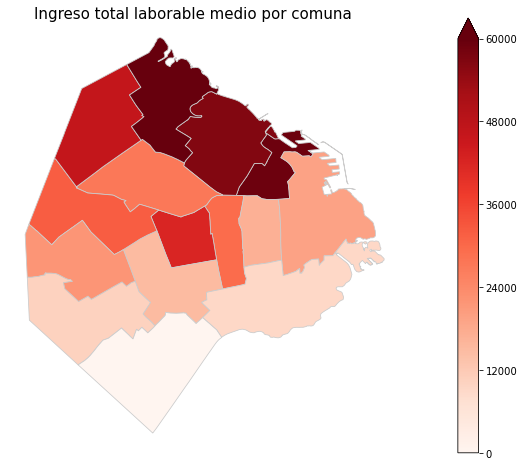

In [62]:
# Creo el colorbar y grafico 

sm = plt.cm.ScalarMappable(cmap='Reds')
sm._A = []

fig, ax = plt.subplots(1, figsize=(20, 8))
fig.suptitle("Ingreso total laborable medio por comuna", fontsize=15,y=.9,x=.6)

CABA_comunas = CABA_comunas.to_crs({'init': 'epsg:3395'}) # Lo paso a Mercator
CABA_comunas.plot(column='ingreso_total_lab', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

#div = np.max(CABA_comunas.ingreso_total_lab)
cbar = fig.colorbar(sm, extend='max', orientation='vertical')
cbar.ax.set_yticklabels([0,12000,24000,36000,48000,60000])  # horizontal colorbar
cbar.ax.locator_params(nbins=5)


C:\Users\Notebook Asus\anaconda3\envs\my_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


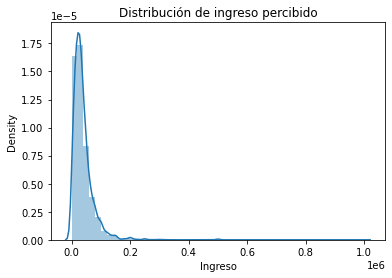

In [63]:
#Realizamos una distribucion de probabilidad del ingreso 

sns.distplot(enc_18a65['ingreso_total_lab'])
plt.title('Distribución de ingreso percibido')
plt.xlabel('Ingreso')
plt.show()

In [45]:
enc_18a65_pos = enc_18a65.loc[enc_18a65["ingreso_total_lab"] > 0]
enc_18a65_pos

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,estado_ocupacional,cat_ocupacional,ingreso_total_lab,estado_educativo,nivel_actual,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
3,2,1,2,2,Resto de la Ciudad,50,Mujer,No Jefe,Viudo/a,Ocupado,Asalariado,70000,No asiste pero asistió,Recibido universitario,17,CABA,Solo prepaga o mutual via OS,2
6,3,1,2,10,Resto de la Ciudad,21,Varon,No Jefe,Unido/a,Ocupado,Asalariado,44000,No asiste pero asistió,Recibido universitario,12,CABA,Solo obra social,0
10,5,1,1,8,Resto de la Ciudad,19,Mujer,Jefe,Soltero/a,Ocupado,Asalariado,28000,Asiste,Terciario/superior no universitario,13,Otra provincia,Solo obra social,0
11,5,2,1,8,Resto de la Ciudad,23,Mujer,Jefe,Soltero/a,Ocupado,Asalariado,25000,Asiste,Terciario/superior no universitario,13,Otra provincia,Solo obra social,0
24,14,1,1,6,Resto de la Ciudad,19,Varon,Jefe,Soltero/a,Ocupado,Asalariado,22000,No asiste pero asistió,Recibido universitario,11,Partido GBA,Solo obra social,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14285,5776,1,2,13,Resto de la Ciudad,52,Varon,No Jefe,Soltero/a,Ocupado,Asalariado,30000,Asiste,Universitario,12,Partido GBA,Solo obra social,0
14288,5778,1,2,6,Resto de la Ciudad,54,Mujer,No Jefe,Viudo/a,Ocupado,Asalariado,24000,No asiste pero asistió,Recibido universitario,10,Partido GBA,Solo obra social,2
14293,5781,1,3,7,Resto de la Ciudad,31,Mujer,No Jefe,Soltero/a,Ocupado,Asalariado,28000,No asiste pero asistió,Recibido universitario,14,CABA,Solo obra social,2
14308,5790,1,2,13,Resto de la Ciudad,37,Mujer,No Jefe,Soltero/a,Ocupado,Asalariado,38000,No asiste pero asistió,Recibido universitario,12,Otra provincia,Solo obra social,1


C:\Users\Notebook Asus\anaconda3\envs\my_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ingreso_total_lab', ylabel='Density'>

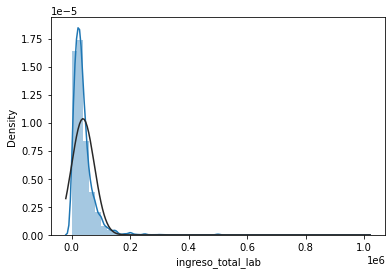

In [46]:
sns.distplot(enc_18a65_pos.ingreso_total_lab,fit=norm)

In [47]:
enc_18a65_pos['ingreso_total_lab'] = np.log10(enc_18a65_pos["ingreso_total_lab"])
enc_18a65_pos.ingreso_total_lab.describe()

count    6824.000000
mean        4.435173
std         0.404873
min         2.000000
25%         4.255273
50%         4.477121
75%         4.698970
max         6.000000
Name: ingreso_total_lab, dtype: float64

C:\Users\Notebook Asus\anaconda3\envs\my_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ingreso_total_lab', ylabel='Density'>

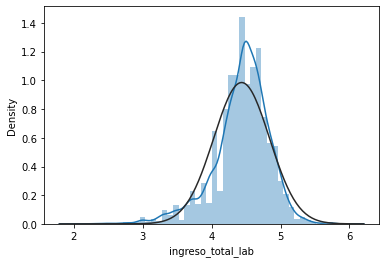

In [48]:
sns.distplot(enc_18a65_pos.ingreso_total_lab,fit=norm)

# Empezamos con los modelos de regresion

In [49]:
#Aplicamos LabelEncoder a las variables categoricas 

cols = ('dominio','parentesco_jefe','estado_ocupacional','nivel_actual','afiliacion_salud','cat_ocupacional','estado_educativo')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(enc_18a65_pos[c].values)) 
    enc_18a65_pos[c] = lbl.transform(list(enc_18a65_pos[c].values))

In [50]:
enc_18a65_pos = pd.get_dummies(enc_18a65_pos,columns=['sexo','situacion_conyugal','lugar_nacimiento'])

In [51]:
enc_18a65_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6824 entries, 3 to 14313
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               6824 non-null   int64  
 1   nhogar                           6824 non-null   int64  
 2   miembro                          6824 non-null   int64  
 3   comuna                           6824 non-null   int64  
 4   dominio                          6824 non-null   int64  
 5   edad                             6824 non-null   int64  
 6   parentesco_jefe                  6824 non-null   int64  
 7   estado_ocupacional               6824 non-null   int64  
 8   cat_ocupacional                  6824 non-null   int64  
 9   ingreso_total_lab                6824 non-null   float64
 10  estado_educativo                 6824 non-null   int64  
 11  nivel_actual                     6824 non-null   int64  
 12  años_escolaridad   

In [52]:
enc_18a65_pos = enc_18a65_pos.reset_index()

In [53]:
enc_18a65_pos.head()


,index,id,nhogar,miembro,comuna,dominio,edad,parentesco_jefe,estado_ocupacional,cat_ocupacional,...,situacion_conyugal_Casado/a,situacion_conyugal_Divorciado/a,situacion_conyugal_Soltero/a,situacion_conyugal_Unido/a,situacion_conyugal_Viudo/a,lugar_nacimiento_CABA,lugar_nacimiento_Otra provincia,lugar_nacimiento_Otro pais,lugar_nacimiento_PBA,lugar_nacimiento_Partido GBA
0,3,2,1,2,2,0,50,1,2,0,...,0,0,0,0,1,1,0,0,0,0
1,6,3,1,2,10,0,21,1,2,0,...,0,0,0,1,0,1,0,0,0,0
2,10,5,1,1,8,0,19,0,2,0,...,0,0,1,0,0,0,1,0,0,0
3,11,5,2,1,8,0,23,0,2,0,...,0,0,1,0,0,0,1,0,0,0
4,24,14,1,1,6,0,19,0,2,0,...,0,0,1,0,0,0,0,0,0,1


In [54]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [55]:
clean_dataset(enc_18a65_pos)

,index,id,nhogar,miembro,comuna,dominio,edad,parentesco_jefe,estado_ocupacional,cat_ocupacional,...,situacion_conyugal_Casado/a,situacion_conyugal_Divorciado/a,situacion_conyugal_Soltero/a,situacion_conyugal_Unido/a,situacion_conyugal_Viudo/a,lugar_nacimiento_CABA,lugar_nacimiento_Otra provincia,lugar_nacimiento_Otro pais,lugar_nacimiento_PBA,lugar_nacimiento_Partido GBA
0,3.0,2.0,1.0,2.0,2.0,0.0,50.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,6.0,3.0,1.0,2.0,10.0,0.0,21.0,1.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10.0,5.0,1.0,1.0,8.0,0.0,19.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,11.0,5.0,2.0,1.0,8.0,0.0,23.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,24.0,14.0,1.0,1.0,6.0,0.0,19.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,14285.0,5776.0,1.0,2.0,13.0,0.0,52.0,1.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6820,14288.0,5778.0,1.0,2.0,6.0,0.0,54.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6821,14293.0,5781.0,1.0,3.0,7.0,0.0,31.0,1.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6822,14308.0,5790.0,1.0,2.0,13.0,0.0,37.0,1.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
# Separamos los features del target

x = enc_18a65_pos.drop(columns=['ingreso_total_lab'])
y = enc_18a65_pos['ingreso_total_lab']

print("Los features seran:","\n",x,"\n")
print("El target sera:","\n", y,"\n")

Los features seran: 
       index    id  nhogar  miembro  comuna  dominio  edad  parentesco_jefe  \
0         3     2       1        2       2        0    50                1   
1         6     3       1        2      10        0    21                1   
2        10     5       1        1       8        0    19                0   
3        11     5       2        1       8        0    23                0   
4        24    14       1        1       6        0    19                0   
...     ...   ...     ...      ...     ...      ...   ...              ...   
6819  14285  5776       1        2      13        0    52                1   
6820  14288  5778       1        2       6        0    54                1   
6821  14293  5781       1        3       7        0    31                1   
6822  14308  5790       1        2      13        0    37                1   
6823  14313  5793       1        2       6        0    52                1   

      estado_ocupacional  cat_ocupacional

In [57]:
# Separamos set de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.45, random_state=1)

In [58]:
# Definimos el escalador 
scaler = StandardScaler()
# Fiteamos para los x_train
scaler = scaler.fit(x_train)

In [59]:
# Transformamos los x_train
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [60]:
# Vamos a crear un dataframe para guardar los resultados de cada estimador
results_df = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])
results_df

,Model,Features,R2,MSE,MAE


# Regresion Lineal

In [73]:
#Definimos el estimador
est = LinearRegression()

#Definimos diccionario con hyperparametros
parameters = {
                'fit_intercept' : [False, True]
            }

#Definimos la cantidad de folds para validar
n_folds = 5

#Definimos el objeto grid search con los parametros anteriores
gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [74]:
#Entrenamos
gs.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [False, True]},
             scoring='neg_mean_squared_error')

In [75]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression() 

{'fit_intercept': True} 

-0.0941596383794699 



In [76]:
# Usamos x_test para predecir con el mejor estimador
linear_prediction = gs.best_estimator_.predict(x_test_scaled)
#Calculamos las metricas R2, MSE y MAE
linear_r2 = r2_score(y_true=y_test, y_pred=linear_prediction)
linear_mse = mean_squared_error(y_true=y_test, y_pred=linear_prediction)
linear_mae = mean_absolute_error(y_true=y_test, y_pred=linear_prediction)

In [77]:
print(f'R2 score: {linear_r2:.6f}')
print(f'MAE: {linear_mae:.6f}')
print(f'MSE: {linear_mse:.6f}')

R2 score: 0.427236
MAE: 0.224629
MSE: 0.098086


In [78]:
#Guardamos los resultados
results_df = results_df.append({'Model':'Linear with log10',
                                'Features':'Lineal',
                                'R2':linear_r2,
                                'MSE':linear_mse,
                                'MAE':linear_mae
                                   },ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,SVR Kernel wit log10,Linear,0.447168,0.094673,0.219484
1,Linear with log10,Lineal,0.427236,0.098086,0.224629


# Regresion Ridge

In [79]:
est = Ridge()

# Lista del parametro lambda (llamado 'alpha' en el GridSearch )
lambdas = [0.1,1,10,20,25,30]

# Juntamos el diccionario de parametros
parameters = {
                'alpha': lambdas
            }

# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs1 = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")

In [80]:
# Entrenamos
gs1.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 20, 25, 30]},
             scoring='neg_mean_squared_error')

In [81]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs1.best_estimator_, "\n")
print(gs1.best_params_, "\n")
print(gs1.best_score_, "\n")

Ridge(alpha=10) 

{'alpha': 10} 

-0.09385349745060183 



In [82]:
#Predicciones + Metricas
ridge_prediction = gs1.best_estimator_.predict(x_test_scaled)
ridge_r2 = r2_score(y_true=y_test, y_pred=ridge_prediction)
ridge_mse = mean_squared_error(y_true=y_test, y_pred=ridge_prediction)
ridge_mae = mean_absolute_error(y_true=y_test, y_pred=ridge_prediction)

In [83]:
print(f'R2 score: {ridge_r2:.6f}')
print(f'MAE: {ridge_mae:.6f}')
print(f'MSE: {ridge_mse:.6f}')

R2 score: 0.427556
MAE: 0.224521
MSE: 0.098032


In [84]:
#Guardamos resultados
results_df = results_df.append({'Model':'Ridge with log10',
                                'Features':'Lineal',
                                'R2':ridge_r2,
                                'MSE':ridge_mse,
                                'MAE':ridge_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,SVR Kernel wit log10,Linear,0.447168,0.094673,0.219484
1,Linear with log10,Lineal,0.427236,0.098086,0.224629
2,Ridge with log10,Lineal,0.427556,0.098032,0.224521


# Regresion Support Vector

In [102]:
est = SVR()

# Lista del parametro lambda (parametro 'alpha')
parameters = {
                'C' : [1,10,50,100,200],
                'epsilon' : [0.0001,0.0015,0.001, 0.01, 0.1,1, 10],
                'gamma':[0.001, 0.01, 0.1,1, 10,100]
             }

# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs2 = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [103]:
# Entrenamos
gs2.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   26.7s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done 348 tasks      | elapsed:  5.6min
[Parallel(n_jobs=3)]: Done 704 tasks      | elapsed: 17.6min
[Parallel(n_jobs=3)]: Done 1050 out of 1050 | elapsed: 34.7min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=3,
             param_grid={'C': [1, 10, 50, 100, 200],
                         'epsilon': [0.0001, 0.0015, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [104]:
print(gs2.best_estimator_, "\n")
print(gs2.best_params_, "\n")
print(gs2.best_score_, "\n")

SVR(C=100, gamma=0.001) 

{'C': 100, 'epsilon': 0.1, 'gamma': 0.001} 

-0.09023662257777523 



In [105]:
# Prediccion + Metricas
svr_prediction = gs2.best_estimator_.predict(x_test_scaled)
svr_r2 = r2_score(y_true=y_test, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=y_test, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=y_test, y_pred=svr_prediction)

In [106]:
print(f'R2 score: {svr_r2:.6f}')
print(f'MAE: {svr_mae:.6f}')
print(f'MSE: {svr_mse:.6f}')

R2 score: 0.447168
MAE: 0.219484
MSE: 0.094673


In [160]:
results_df = results_df.append({'Model':'SVR with log10',
                                'Features':'Linear',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear with log10,Lineal,0.427236,0.098086,0.224629
1,Ridge with log10,Lineal,0.427556,0.098032,0.224521
2,Tree Dec with log10,Linear,0.402816,0.102268,0.229806
3,KNN Reg with log10,Linear,0.357211,0.110078,0.235997
4,SVR with log10,Linear,0.447168,0.094673,0.219484


# Regresion por Arbol de Decision

In [89]:
est = DecisionTreeRegressor(random_state=0)

parameters = {
                'max_depth':[1,5,10,15],
                 'min_samples_split': [1,5,10,15],
                 'min_samples_leaf': [1,5,10,15,20,25,30,35,40],
                 'max_features': ['auto', 'sqrt', 'log2']
            }

# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs3 = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [90]:
# Entrenamos
gs3.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   16.3s
[Parallel(n_jobs=3)]: Done 1208 tasks      | elapsed:   22.5s
[Parallel(n_jobs=3)]: Done 2160 out of 2160 | elapsed:   28.6s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=3,
             param_grid={'max_depth': [1, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20, 25, 30, 35, 40],
                         'min_samples_split': [1, 5, 10, 15]},
             scoring='neg_mean_squared_error', verbose=3)

In [91]:
print(gs3.best_estimator_, "\n")
print(gs3.best_params_, "\n")
print(gs3.best_score_, "\n")

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=35,
                      min_samples_split=5, random_state=0) 

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 35, 'min_samples_split': 5} 

-0.09259944975930896 



In [92]:
# Prediccion + Metricas
rtd_prediction = gs3.best_estimator_.predict(x_test_scaled)
rtd_r2 = r2_score(y_true=y_test, y_pred=rtd_prediction)
rtd_mse = mean_squared_error(y_true=y_test, y_pred=rtd_prediction)
rtd_mae = mean_absolute_error(y_true=y_test, y_pred=rtd_prediction)

In [93]:
print(f'R2 score: {rtd_r2:.6f}')
print(f'MAE: {rtd_mae:.6f}')
print(f'MSE: {rtd_mse:.6f}')

R2 score: 0.402816
MAE: 0.229806
MSE: 0.102268


In [94]:
results_df = results_df.append({'Model':'Tree Dec with log10',
                                'Features':'Linear',
                                'R2':rtd_r2,
                                'MSE':rtd_mse,
                                'MAE':rtd_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,SVR Kernel wit log10,Linear,0.447168,0.094673,0.219484
1,Linear with log10,Lineal,0.427236,0.098086,0.224629
2,Ridge with log10,Lineal,0.427556,0.098032,0.224521
3,Tree Dec with log10,Linear,0.402816,0.102268,0.229806


In [95]:
#results_df = results_df.drop(index=2)

# KNN Regresion

In [96]:
est = KNeighborsRegressor()

parameters = {
                'n_neighbors':[1,10,30,50,70,100],
                'weights': ['uniform', 'distance']
            }
    
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs4 = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [97]:
#Entrenamos 
gs4.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:    8.9s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=3,
             param_grid={'n_neighbors': [1, 10, 30, 50, 70, 100],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=3)

In [98]:
print(gs4.best_estimator_, "\n")
print(gs4.best_params_, "\n")
print(gs4.best_score_, "\n")

KNeighborsRegressor(n_neighbors=30, weights='distance') 

{'n_neighbors': 30, 'weights': 'distance'} 

-0.10593266621371325 



In [99]:
# Prediccion + Metricas
knn_prediction = gs4.best_estimator_.predict(x_test_scaled)
knn_r2 = r2_score(y_true=y_test, y_pred=knn_prediction)
knn_mse = mean_squared_error(y_true=y_test, y_pred=knn_prediction)
knn_mae = mean_absolute_error(y_true=y_test, y_pred=knn_prediction)

In [100]:
print(f'R2 score: {knn_r2:.6f}')
print(f'MAE: {knn_mae:.6f}')
print(f'MSE: {knn_mse:.6f}')

R2 score: 0.357211
MAE: 0.235997
MSE: 0.110078


In [101]:
results_df = results_df.append({'Model':'KNN Reg with log10',
                                'Features':'Linear',
                                'R2':knn_r2,
                                'MSE':knn_mse,
                                'MAE':knn_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,SVR Kernel wit log10,Linear,0.447168,0.094673,0.219484
1,Linear with log10,Lineal,0.427236,0.098086,0.224629
2,Ridge with log10,Lineal,0.427556,0.098032,0.224521
3,Tree Dec with log10,Linear,0.402816,0.102268,0.229806
4,KNN Reg with log10,Linear,0.357211,0.110078,0.235997


# SVR con kernel

In [ ]:
#results_df = results_df.drop(index=4)

In [64]:
est = SVR()

# Lista del parametro lambda (parametro 'alpha')
parameters = {
                'C' : [10,100,300,700],
                'epsilon' : [0.001, 0.01, 0.1,1, 10],
                'gamma':[0.001, 0.01, 0.1,1, 10],
                'kernel': ['rbf']#, 'poly'],
                #'degree': [3,4,5]
             }

# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs5 = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=5, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [65]:
# Entrenamos
gs5.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   45.3s
[Parallel(n_jobs=3)]: Done 174 tasks      | elapsed:  4.9min
[Parallel(n_jobs=3)]: Done 390 tasks      | elapsed: 19.6min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed: 32.4min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=3,
             param_grid={'C': [10, 100, 300, 700],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=3)

In [66]:
print(gs5.best_estimator_, "\n")
print(gs5.best_params_, "\n")
print(gs5.best_score_, "\n")

SVR(C=100, gamma=0.001) 

{'C': 100, 'epsilon': 0.1, 'gamma': 0.001, 'kernel': 'rbf'} 

-0.09023662257777523 



In [67]:
# Prediccion + Metricas
svr2_prediction = gs5.best_estimator_.predict(x_test_scaled)
svr2_r2 = r2_score(y_true=y_test, y_pred=svr2_prediction)
svr2_mse = mean_squared_error(y_true=y_test, y_pred=svr2_prediction)
svr2_mae = mean_absolute_error(y_true=y_test, y_pred=svr2_prediction)

In [68]:
print(f'R2 score: {svr2_r2:.6f}')
print(f'MAE: {svr2_mae:.6f}')
print(f'MSE: {svr2_mse:.6f}')

R2 score: 0.447168
MAE: 0.219484
MSE: 0.094673


In [69]:
results_df = results_df.append({'Model':'SVR Kernel wit log10',
                                'Features':'Linear',
                                'R2':svr2_r2,
                                'MSE':svr2_mse,
                                'MAE':svr2_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,SVR Kernel wit log10,Linear,0.447168,0.094673,0.219484


C:\Users\Notebook Asus\anaconda3\envs\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.03399101624957947

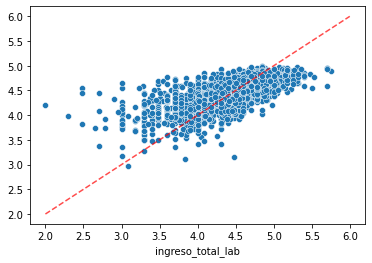

In [112]:
sns.scatterplot(y_test, svr_prediction)
plt.plot((2,6), (2,6), '--', color= 'r', alpha= 0.7, label= 'ideal')


In [127]:
base=10
exp=np.mean((svr_prediction-y_test))
print ("El valor de la media de los residuos es: ", np.round(pow(base,exp),4))

El valor de la media de los residuos es:  1.0814
